In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# Cleaning Data

In [105]:
df=pd.read_csv('/content/customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
200,9323-HGFWY,Female,0,Yes,No,27,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),101.90,2681.15,No
2516,8245-UMPYT,Female,1,No,No,16,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.2,Yes
6119,0080-EMYVY,Female,0,No,No,14,Yes,No,DSL,No,...,No,No,No,No,One year,No,Credit card (automatic),51.45,727.85,No
6572,6258-PVZWJ,Male,0,Yes,No,68,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.80,6302.85,No
1188,0080-OROZO,Female,0,No,No,35,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,99.25,3532,No


In [106]:
df.drop('customerID',axis='columns', inplace=True)

In [107]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [108]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [109]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [110]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [111]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [112]:
df1=df[df['TotalCharges']!=' ']
df1.shape

(7032, 20)

In [113]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [114]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


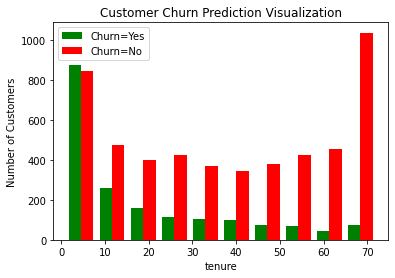

In [116]:
tenure_churn_no=df1[df1['Churn']=='No']['tenure']
tenure_churn_yes=df1[df1['Churn']=='Yes']['tenure']

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

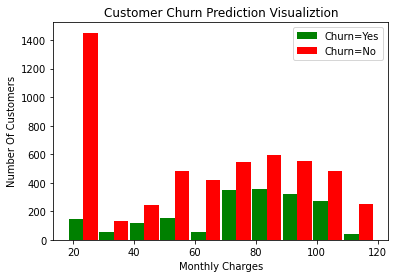

In [117]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [118]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [119]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [120]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [121]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Changing strings to numeric form

In [122]:
df1.replace('Yes',1,inplace=True)
df1.replace('No',0,inplace=True)

In [123]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
9,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0
793,Female,0,0,1,34,1,0,DSL,1,0,1,1,1,0,Two year,0,Credit card (automatic),67.65,2339.30,0
6809,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Electronic check,74.95,308.70,1
2978,Male,0,0,0,24,1,0,Fiber optic,0,1,1,1,0,0,Month-to-month,1,Electronic check,85.95,2107.15,0
2207,Female,0,1,0,7,1,0,Fiber optic,0,0,1,0,1,0,Month-to-month,1,Electronic check,86.25,587.10,1


In [124]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [125]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [126]:
df1['InternetService'].replace(0,'No',inplace=True)
print_unique_col_values(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [127]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

In [128]:
print_unique_col_values(df1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


# One-Hot-Encoding Data

In [129]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [130]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5120,0,0,1,1,7,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2880,0,0,0,0,12,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
7028,1,0,1,0,68,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
6153,0,0,1,1,60,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3853,0,0,0,0,46,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [131]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Scaling Data

In [132]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [133]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6172,0,0,1,0,0.126761,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3037,0,0,0,0,0.436620,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5535,1,0,1,1,0.760563,1,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0


In [134]:
print_unique_col_values(df2)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [135]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Hence this dataset is imbalanced

# Splitting data into train and test datasets

In [136]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [137]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [138]:
X_train.shape, y_train.shape, y_test.shape

((6328, 26), (6328,), (704,))

# Training Logistic Regression Model

In [139]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [140]:
model.fit(X_train,y_train)

LogisticRegression()

In [141]:
model.score(X_test,y_test)

0.8110795454545454

In [142]:
y_pred=model.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [143]:
y_test[:10]

69      0
353     1
2476    0
2805    0
3747    0
3355    0
5594    0
2456    0
286     0
6839    1
Name: Churn, dtype: int64

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       541
           1       0.58      0.67      0.62       163

    accuracy                           0.81       704
   macro avg       0.74      0.76      0.75       704
weighted avg       0.82      0.81      0.82       704



# Function to get model Logistic Regression Model

In [145]:
def get_model(X_train,y_train):
    model=LogisticRegression()
    model.fit(X_train,y_train)

    return model

# Method 1 : Use of Undersampling

In [146]:
count_class_0,count_class_1=df2['Churn'].value_counts()

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

count_class_0,count_class_1

(5163, 1869)

In [147]:
df_class_0_under=df_class_0.sample(count_class_1)
df_class_0_under.shape

(1869, 27)

In [148]:
df_final_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_final_under.shape

(3738, 27)

In [149]:
df_final_under['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [150]:
X_train,X_test,y_train,y_test=train_test_split(df_final_under.drop('Churn', axis='columns'),df_final_under['Churn'],train_size=0.9,stratify=df_final_under['Churn'])

X_train.shape,y_test.shape

((3364, 26), (374,))

In [151]:
y_test.value_counts()

0    187
1    187
Name: Churn, dtype: int64

In [152]:
model1=get_model(X_train,y_train)

y_pred=model1.predict(X_test)

In [154]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       169
           1       0.80      0.73      0.76       205

    accuracy                           0.75       374
   macro avg       0.75      0.75      0.75       374
weighted avg       0.75      0.75      0.75       374



# Comparison with normal Logistic Regression Model

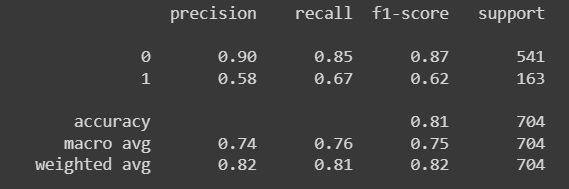

# Method 2 : Use of Oversampling

In [155]:
count_class_0,count_class_1

(5163, 1869)

In [156]:
df_class_1_over=df_class_1.sample(count_class_0, replace=True)

In [157]:
df_final_over=pd.concat([df_class_0,df_class_1_over],axis=0)

df_final_over['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [158]:
X_train,X_test,y_train,y_test=train_test_split(df_final_over.drop('Churn', axis='columns'),df_final_over['Churn'],train_size=0.8,stratify=df_final_over['Churn'])

In [159]:
y_train.value_counts(),y_test.value_counts()

(0    4130
 1    4130
 Name: Churn, dtype: int64, 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [167]:
model2=get_model(X_train,y_train)

y_pred=model2.predict(X_test)

In [168]:
y_pred=model2.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       931
           1       0.85      0.78      0.81      1135

    accuracy                           0.80      2066
   macro avg       0.80      0.81      0.80      2066
weighted avg       0.81      0.80      0.80      2066



# Comparison with normal Logistic Regression Model

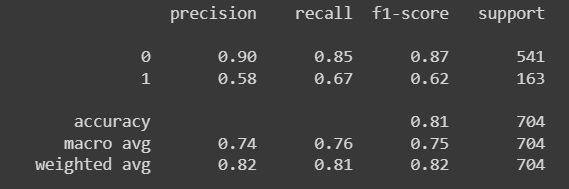

# Method 3 : Use of SMOTE

In [162]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [163]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [164]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,train_size=0.8,stratify=y_sm)

y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [172]:
model3=get_model(X_train,y_train)

y_pred=model3.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       982
           1       0.83      0.79      0.81      1084

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



# Comparison with normal Logistic Regression Model

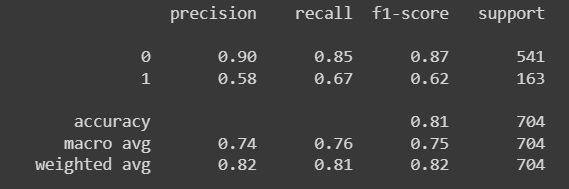

# Method 4 : Use of Ensemble

In [173]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [175]:
x=df2.drop('Churn', axis='columns')
y=df2['Churn']

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [184]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [203]:
y_test.shape

(1407,)

In [186]:
df3=X_train.copy()
df3['Churn']=y_train

df3_class_0=df3[df3['Churn']==0]
df3_class_1=df3[df3['Churn']==1]

In [189]:
df3_class_1['Churn'].value_counts()

1    1495
Name: Churn, dtype: int64

In [190]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [195]:
def get_dataset(majority_data,minority_data,start,end):
    df_train=pd.concat([majority_data[start:end],minority_data],axis=0)

    X_train=df3.drop('Churn',axis='columns')
    y_train=df3['Churn']

    return X_train,y_train

In [206]:
X_train,y_train=get_dataset(df3_class_0,df3_class_1,0,1495)
model4_1=get_model(X_train,y_train)
y_pred4_1=model4_1.predict(X_test)

In [207]:
X_train,y_train=get_dataset(df3_class_0,df3_class_1,1495,2990)
model4_2=get_model(X_train,y_train)
y_pred4_2=model4_2.predict(X_test)

In [208]:
X_train,y_train=get_dataset(df3_class_0,df3_class_1,2990,4130)
model4_3=get_model(X_train,y_train)
y_pred4_3=model4_3.predict(X_test)

In [213]:
y_pred_final=y_pred4_1
for i in range(len(y_pred4_1)):
    ones=y_pred4_1[i]+y_pred4_2[i]+y_pred4_3[i]
    if ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [214]:
print(classification_report(y_pred_final,y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1102
           1       0.54      0.66      0.59       305

    accuracy                           0.80      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.82      0.80      0.81      1407



# Comparison with normal Logistic Regression Model

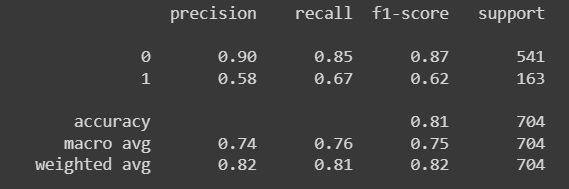

Hence we can conclude that oversampling worked best to increase the performance metrics of our Logistic Regression Model